## Task:  classify origin of wine based on physio-chemical analysis data. 

You are provided data that are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

Details can be [**found here**](http://archive.ics.uci.edu/ml/datasets/Wine).

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import csv
import pandas
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import learning_curve
from sklearn import metrics

## Read in the data 

#### Data set

In [3]:
df = pd.read_csv('../Data/wine.data.csv', header=None)
df.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


#### Describe the basic statistics of the features

#### Make boxplots by output labels/classes - do any features classify the wine based on these figures?

If so (and hint, they do!), make a scatter plot showing the correlation of two features showing the correlation of two features and class separation by these features

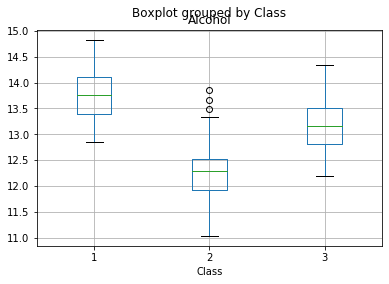

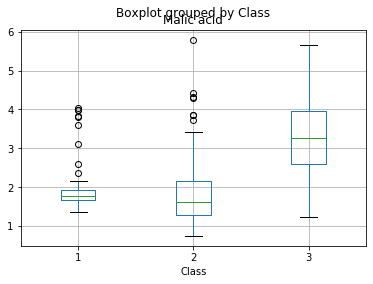

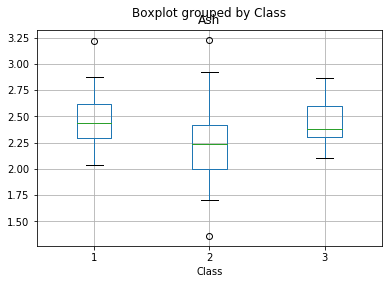

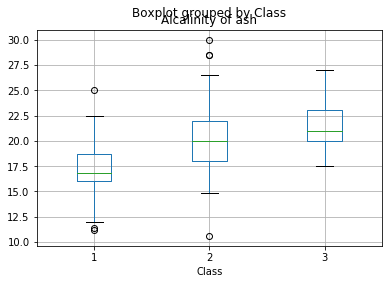

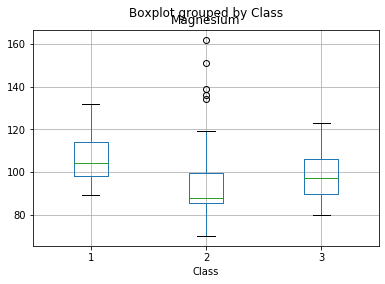

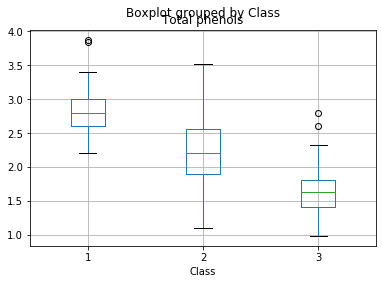

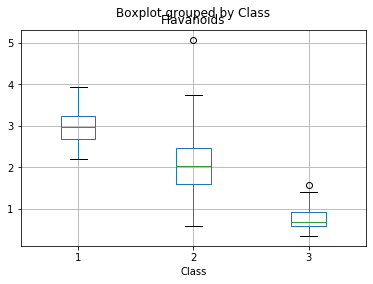

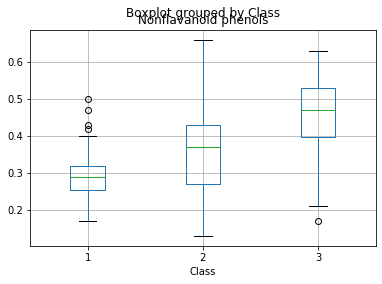

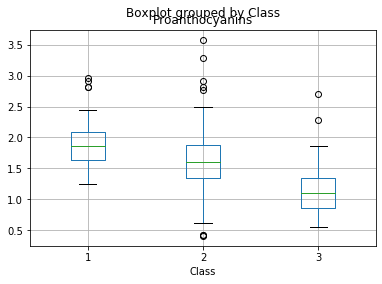

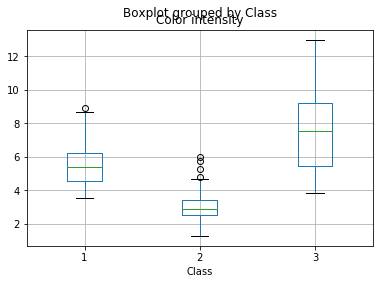

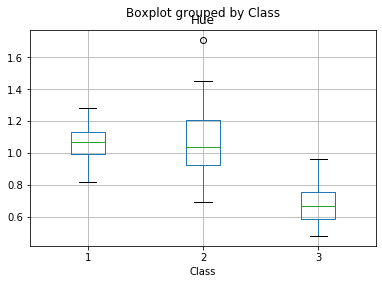

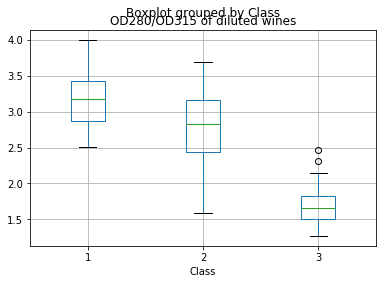

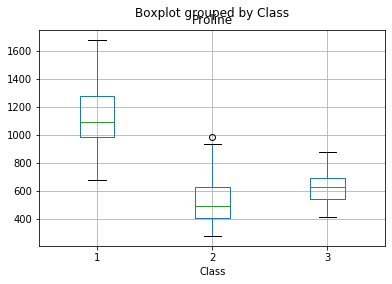

In [4]:
#Create boxplots for each of the attributes
for i in df.columns[1:]:
    df.boxplot(i, by='Class') 


####  Naive Bayes Classification

Use [Naive Bayes Classification](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) to create a model to classify wine base on attributes.  Justify how good the model is for the wine classification.  Note that some of the metrics we've used in class are only for *binary* classifications, so may not eb applicable here.


In [5]:
#The 'Y' variable that we are trying to predict is the class of wine
Y = df['Class']
print(Y.head())
print(Y.shape)

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64
(178,)


In [15]:
#Based on the results of the boxplot, look at which features have distinct differences between classes, and use only these features in the predictive model
X = df.drop(['Class', 'Malic acid', 'Ash','Alcalinity of ash','Magnesium','Proanthocyanins','Hue','Proline'], axis=1)
print(X.shape)
X.head()

(178, 6)


,Alcohol,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,OD280/OD315 of diluted wines
0,14.23,2.80,3.06,0.28,5.64,3.92
1,13.20,2.65,2.76,0.26,4.38,3.40
2,13.16,2.80,3.24,0.30,5.68,3.17
3,14.37,3.85,3.49,0.24,7.80,3.45
4,13.24,2.80,2.69,0.39,4.32,2.93


In [16]:
#Split appart the data into a training set and an actual set of test data 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.25, random_state = 1)

In [17]:
#Check the sizes of the lists that were just created
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(133, 6)
(45, 6)
(133,)
(45,)


In [18]:
#This tool can only be used for data with discrete features
#nb = MultinomialNB()
#nb.fit(Xtrain, Ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
#Instantiate the tool and fit the model with the set of training data
nb = GaussianNB()
nb.fit(Xtrain,Ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
#Give the model a set of X data and let it try to predict Y
yclassprediction = nb.predict(Xtest)

In [24]:
#The accuracy of the predictive model is 95%
howgood = metrics.accuracy_score(Ytest, yclassprediction)
howgood

0.9555555555555556

In [26]:
#The confusion matrix shows the results of the algorithm. Of the 19 wines in class one, the model predicted that one of them 
#was class two. Of the 15 class two wines, the model predicted that all 15 were class two. Of the 11 class three wines, the
#model predicted that 1 of them was a class two wine. Overall, the predictve model only had two mistakes. 

cm = metrics.confusion_matrix(Ytest, yclassprediction)
cm

array([[18,  0,  0],
       [ 1, 15,  1],
       [ 0,  0, 10]], dtype=int64)